In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
# Menampilkan dataset

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
X = data.drop('date', axis=1)  # Ganti 'target_column' dengan kolom target
y = data['weather']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Lakukan encoding terhadap nilai-nilai kategorikal dalam X_train dan X_test
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Buat model Decision Tree
clf = DecisionTreeClassifier()

# Tentukan rentang hyperparameter yang ingin Anda jelajahi
param_grid = {
    'max_depth': [3],  # Menggunakan kedalaman maksimum yang lebih rendah
    'min_samples_split': [5],  # Nilai min_samples_split yang lebih tinggi
    'min_samples_leaf': [5]  # Nilai min_samples_leaf yang lebih tinggi
}

# Mencari kombinasi hyperparameter terbaik menggunakan GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Mencetak kombinasi hyperparameter terbaik
print("Best hyperparameters:", grid_search.best_params_)

# Prediksi label untuk data uji menggunakan model terbaik dari GridSearchCV
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_encoded)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.9726962457337884


In [ ]:
# Membaca data dari file atau sumber lainnya
data = pd.read_csv('/content/seattle-weather.csv')  # Ganti 'nama_file.csv' dengan nama file data Anda

# Melakukan penggantian label
data['weather'].replace({'drizzle': 1, 'rain': 0, 'sun': 2, 'snow': 3}, inplace=True)

# Menampilkan data setelah penggantian label
print(data.head())

         date  precipitation  temp_max  temp_min  wind weather
0  2012-01-01            0.0      12.8       5.0   4.7       1
1  2012-01-02           10.9      10.6       2.8   4.5       0
2  2012-01-03            0.8      11.7       7.2   2.3       0
3  2012-01-04           20.3      12.2       5.6   4.7       0
4  2012-01-05            1.3       8.9       2.8   6.1       0


In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,1
1,2012-01-02,10.9,10.6,2.8,4.5,0
2,2012-01-03,0.8,11.7,7.2,2.3,0
3,2012-01-04,20.3,12.2,5.6,4.7,0
4,2012-01-05,1.3,8.9,2.8,6.1,0


In [ ]:
# Menerapkan one-hot encoding pada fitur kategorikal
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melatih model pada data latih yang sudah diencode
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

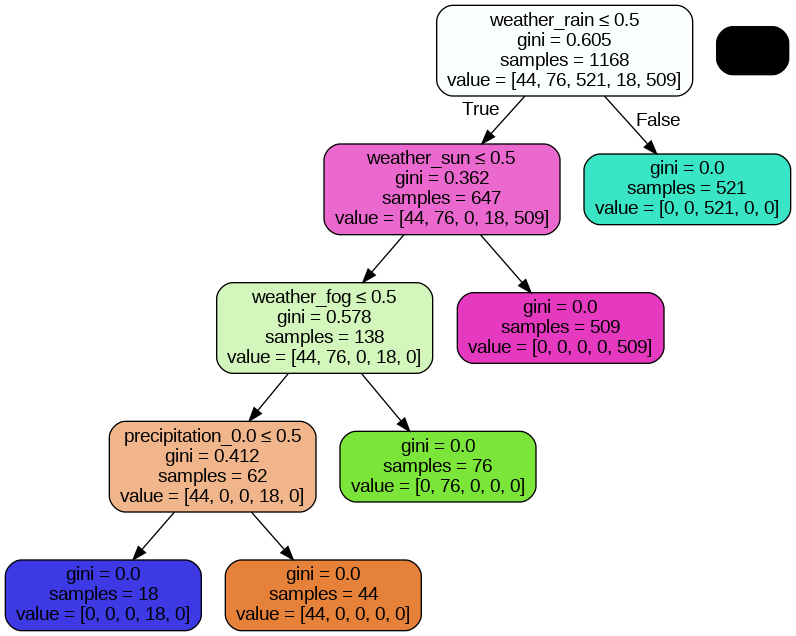

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

# Buat dan latih model Decision Tree
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_encoded, y_train)

# Menampilkan pohon keputusan
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=encoder.get_feature_names_out(input_features=X_train.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())